# 🎬 Movie Box Office Analysis
## Project By Faizal Ardian Putra

### Table Of Contents
1. Project Overview & Goals
2. Data Loading & Exploration
3. Data Cleaning & Preprocessing
4. Exploratory Data Analysis
5. Feature Engineering
6. Machine Learning Model
7. Results & Insights
8. Conclusions & Next Steps

## 1. Project Overview & Goals

This project analyzes movie data to:
- Understand factor that influence box office success
- Identify trends in the movie industry
- Build a predictive model for movie revenue
- Create insightful visualizations

**Dataset:** Move financial and rating data

**Tools:** Python, Pandas, Matplotlib, Seaborn, Scikit-learn

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set visualizatio style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully")
print("🎬 Ready to analyze movie data!")

✅ All libraries imported successfully
🎬 Ready to analyze movie data!


## 2. Data Loading & Exploration

- Load data from CSV file using `pd.read_csv()`
- Use APIs like TMDB or OMDB
- Scrape data from website (ethically)

In [10]:
# Create realistic movie dataset for analysis
np.random.seed(42)  #for reproducible results

n_movies = 1500

# Generate movie data
movies_df = pd.DataFrame({
    'title': [f'Movie_{i:04d}' for i in range(n_movies)],
    'genre': np.random.choice(['Action', 'Comedy', 'Drama', 'Horror', 'Romance', 'Sci-fi', 'Thriller'], n_movies),
    'year': np.random.randint(2000, 2025, n_movies),
    'budget_millions': np.random.gamma(2, 15),
    'runtime_minutes': np.random.normal(108, 18, n_movies),
    'imdb_rating': np.clip(np.random.normal(6.2, 1.2, n_movies), 1, 10),
    'director_experience': np.random.randint(1, 25, n_movies),
    'star_power': np.random.uniform(1, 10, n_movies),
    'studio_size': np.random.choice(['Major', "Independent", 'Mid-tier'], n_movies, p=[0.3, 0.4, 0.3])
})

# Create realistic revenue based on multiple factors
base_multiplier = 2.5
genre_impact = {
    'Action': 1.4,
    'Sci-fi': 1.3,
    'Comedy': 1.1,
    'Thriller': 1.2,
    'Drama': 0.8,
    'Romance': 0.9,
    'Horror': 1.1
}
studio_impact = {
    'Major': 1.3,
    'Mid-tier': 1.0,
    'Independent': 0.7
}

movies_df['revenue_millions'] = movies_df.apply(
    lambda row:
      max(0, row['budget_millions'] * base_multiplier *
          genre_impact[row['genre']] *
          studio_impact[row['studio_size']] *
          (row['imdb_rating'] / 6.5) *
          (row['star_power'] / 5) *
          np.random.normal(1, 0.3)), axis=1
)

# Add some realistic contraints
movies_df['runtime_minutes'] = np.clip(movies_df['runtime_minutes'], 60, 180)
movies_df['budget_millions'] = np.clip(movies_df['budget_millions'], 0.5, 300)

print(f"✅ Dataset created with {len(movies_df)} movies")
print(f"📊 Data shape: {movies_df.shape}")
movies_df.head()

✅ Dataset created with 1500 movies
📊 Data shape: (1500, 10)


,title,genre,year,budget_millions,runtime_minutes,imdb_rating,director_experience,star_power,studio_size,revenue_millions
0,Movie_0000,Thriller,2016,14.937995,129.501574,7.041551,6,6.965072,Mid-tier,55.348308
1,Movie_0001,Horror,2012,14.937995,130.593573,5.625704,21,6.311537,Independent,21.632593
2,Movie_0002,Romance,2015,14.937995,111.391488,5.683296,8,4.804323,Mid-tier,36.898617
3,Movie_0003,Thriller,2007,14.937995,105.733098,7.157123,19,2.807895,Independent,9.824925
4,Movie_0004,Drama,2018,14.937995,95.085267,5.015690,22,3.751319,Mid-tier,14.328540


In [11]:
# Basic data exploration
print("🔍 DATASET OVERVIEW")
print("=" * 40)
print(f"Number of movies {len(movies_df)}")
print(f"Features: {len(movies_df.columns)}")
print(f"Year range: {movies_df['year'].min()} - {movies_df['year'].max()}")

print("\n📊 BASIC STATISTICS")
print("=", 40)
print(movies_df.describe().round(2))

print("\n🎭 GENRE DISTRIBUTION")
print("=" * 40)
print(movies_df['genre'].value_counts())

print("\n🏭 STUDIO DISTRIBUTION")
print("=" * 40)
print(movies_df['studio_size'].value_counts())

🔍 DATASET OVERVIEW
Number of movies 1500
Features: 10
Year range: 2000 - 2024

📊 BASIC STATISTICS
= 40
          year  budget_millions  runtime_minutes  imdb_rating  \
count  1500.00          1500.00          1500.00      1500.00   
mean   2011.85            14.94           109.21         6.19   
std       7.25             0.00            18.34         1.18   
min    2000.00            14.94            60.00         2.31   
25%    2006.00            14.94            97.02         5.42   
50%    2012.00            14.94           109.67         6.18   
75%    2018.00            14.94           121.37         7.00   
max    2024.00            14.94           166.69        10.00   

       director_experience  star_power  revenue_millions  
count              1500.00     1500.00           1500.00  
mean                 12.46        5.57             42.34  
std                   6.90        2.58             29.96  
min                   1.00        1.03              0.00  
25%             

## 3. Data Cleaning & Preprocessing

Essential steps for any data science project:
- Check for missing values
- Handle outliers
- Verify data types
- Create new features if needed

In [12]:
# Check for missing values
print("🔍 MISSING VALUES CHECK")
print("=" * 40)
missing_values = movies_df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
  print("✅ No Missing values found!")
else:
  print("⚠️ Missing values detected - clearning needed")

# Check data types
print("\n📝 DATA TYPES")
print("=" * 40)
print(movies_df.dtypes)

# Check for outliers using IQR method
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return len(outliers)

print("\n🎯 OUTLIER DETECTION")
print("=" * 40)
numeric_columns = ['budget_millions', 'revenue_millions', 'runtime_minutes', 'imdb_rating']
for col in numeric_columns:
  outlier_count = detect_outliers(movies_df, col)
  print(f"{col}: {outlier_count} outliers")

# Create profit margin feature
movies_df['profit_millions'] = movies_df['revenue_millions'] - movies_df['budget_millions']
movies_df['roi'] = (movies_df['profit_millions'] / movies_df['budget_millions']) * 100

print("\n Data cleaning completed!")
print(f"📊 Final dataset shape: {movies_df.shape}")

🔍 MISSING VALUES CHECK
title                  0
genre                  0
year                   0
budget_millions        0
runtime_minutes        0
imdb_rating            0
director_experience    0
star_power             0
studio_size            0
revenue_millions       0
dtype: int64
✅ No Missing values found!

📝 DATA TYPES
title                   object
genre                   object
year                     int64
budget_millions        float64
runtime_minutes        float64
imdb_rating            float64
director_experience      int64
star_power             float64
studio_size             object
revenue_millions       float64
dtype: object

🎯 OUTLIER DETECTION
budget_millions: 0 outliers
revenue_millions: 39 outliers
runtime_minutes: 12 outliers
imdb_rating: 11 outliers

 Data cleaning completed!
📊 Final dataset shape: (1500, 12)


## 4. Exploratory Data Analysis

Let's discover insights through visualization:
- Revenue trends over time
- Genre performance comparison
- Rating vs revenue relationships
- Budget vs revenue correlation

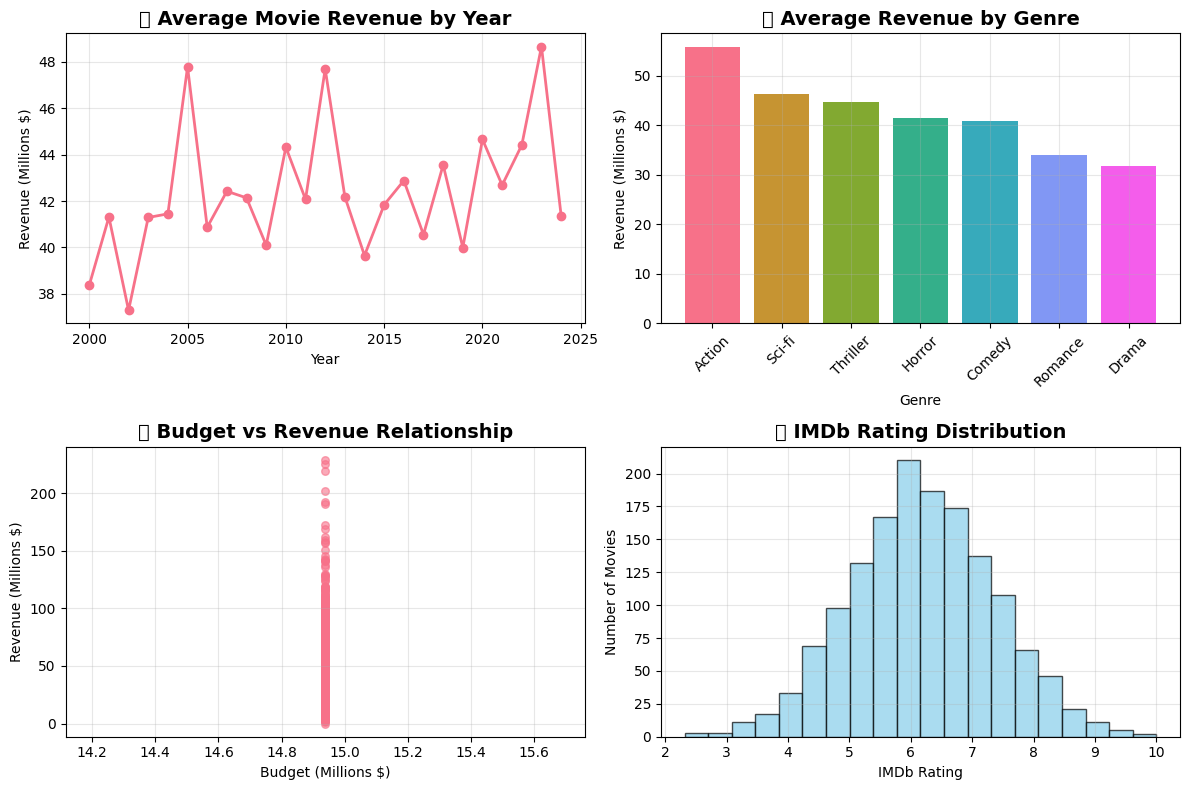

🔍 KEY INSIGHTS FROM EDA:
📊 Highest grossing genre: Action ($55.8M avg)
💰 Budget-Revenue correlation: 0.000
⭐ Average IMDb rating: 6.19
🎬 Most Profitable Year: 2023 ($48.7M avg)


In [13]:
# 1. Revenue trends over time
plt.figure(figsize=(12, 8))

# Subplot 1: Average revenue by year
plt.subplot(2, 2, 1)
yearly_revenue = movies_df.groupby('year')['revenue_millions'].mean()
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o', linewidth=2)
plt.title('📈 Average Movie Revenue by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions $)')
plt.grid(True, alpha=0.3)

# Subplot 2: Genre performance
plt.subplot(2, 2, 2)
genre_revenue = movies_df.groupby('genre')['revenue_millions'].mean().sort_values(ascending=False)
bars = plt.bar(range(len(genre_revenue)), genre_revenue.values, color=sns.color_palette('husl', len(genre_revenue)))
plt.title('🎭 Average Revenue by Genre', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Revenue (Millions $)')
plt.xticks(range(len(genre_revenue)), genre_revenue.index, rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 3: Budget vs Revenue Scatter
plt.subplot(2, 2, 3)
plt.scatter(movies_df['budget_millions'], movies_df['revenue_millions'], alpha=0.6, s=30)
plt.title('💰 Budget vs Revenue Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Revenue (Millions $)')
plt.grid(True, alpha=0.3)

# Add correlation line
z = np.polyfit(movies_df['budget_millions'], movies_df['revenue_millions'], 1)
p = np.poly1d(z)
plt.plot(movies_df['budget_millions'].sort_values(), p(movies_df['budget_millions'].sort_values()), "r--", alpha=0.8)

# Subplot 4: Rating distribution
plt.subplot(2, 2, 4)
plt.hist(movies_df['imdb_rating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('⭐ IMDb Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print inisghts
print("🔍 KEY INSIGHTS FROM EDA:")
print("=" * 40)
print(f"📊 Highest grossing genre: {genre_revenue.index[0]} (${genre_revenue.iloc[0]:.1f}M avg)")
print(f"💰 Budget-Revenue correlation: {movies_df['budget_millions'].corr(movies_df['revenue_millions']):.3f}")
print(f"⭐ Average IMDb rating: {movies_df['imdb_rating'].mean():.2f}")
print(f"🎬 Most Profitable Year: {yearly_revenue.idxmax()} (${yearly_revenue.max():.1f}M avg)")

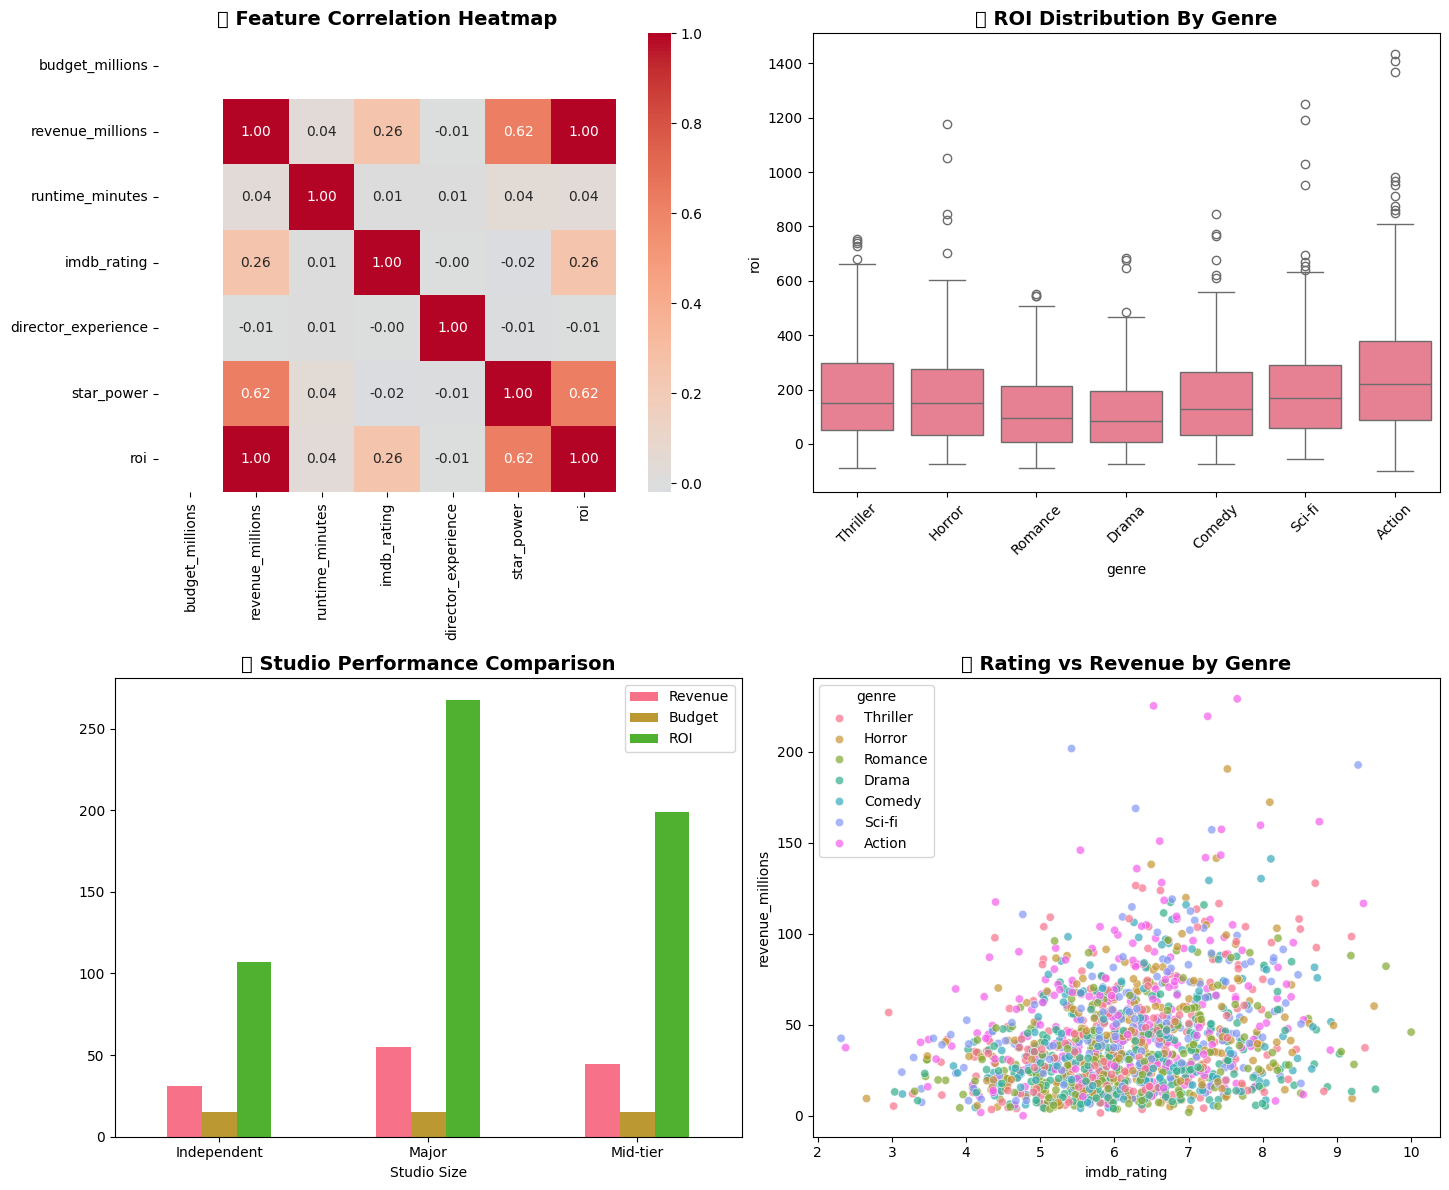


💡 ADVANCED INSIGHTS:
Top 3 Correlations with revenue:
 • revenue_millions: 1.000
 • star_power: 0.619
 • imdb_rating: 0.258

🏆 Most profitable studio type: Major
💸 Highest budget studio type: Independent


In [14]:
# Advanced visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Heatmap of crrelations
numeric_cols = ['budget_millions', 'revenue_millions', 'runtime_minutes', 'imdb_rating', 'director_experience', 'star_power', 'roi']
correlation_matrix = movies_df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, ax=axes[0,0], fmt='.2f')
axes[0,0].set_title('🔥 Feature Correlation Heatmap', fontsize=14, fontweight='bold')

# 2. Box plot: Genre vs ROI
sns.boxplot(data=movies_df, x='genre', y='roi', ax=axes[0,1])
axes[0,1].set_title('📦 ROI Distribution By Genre', fontsize=14, fontweight='bold')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)

# 3. Studio size performance
studio_performance = movies_df.groupby('studio_size').agg({
    'revenue_millions': 'mean',
    'budget_millions': 'mean',
    'roi': 'mean'
}).round(2)

studio_performance.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('🏭 Studio Performance Comparison', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Studio Size')
axes[1,0].legend(['Revenue', 'Budget', 'ROI'])
axes[1,0].tick_params(axis='x', rotation=0)

# 4. Rating vs Revenue with trend line
sns.scatterplot(data=movies_df, x='imdb_rating', y='revenue_millions', hue='genre', alpha=0.7, ax=axes[1,1])
axes[1,1].set_title('⭐ Rating vs Revenue by Genre', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional insights
print("\n💡 ADVANCED INSIGHTS:")
print("=" * 40)
print("Top 3 Correlations with revenue:")
revenue_corr = correlation_matrix['revenue_millions'].abs().sort_values(ascending=False)[1:4]
for feature, corr in revenue_corr.items():
  print(f" • {feature}: {corr:.3f}")

print(f"\n🏆 Most profitable studio type: {studio_performance['roi'].idxmax()}")
print(f"💸 Highest budget studio type: {studio_performance['budget_millions'].idxmax()}")

## 5. Machine Learning Model

Now we will build a predictive model to estimate movie revenue based on our features:
- **Goal:** Predict box office revenue
- **Features:** Budget, rating, genre, studio_size, etc.
- **Models:** Linear Regression and Random Forest
- **Evaluation:** R² score and RMSE

In [15]:
# Prepare data for machine learning
print("🤖 PREPARING DATA FOR MACHINE LEARNING")
print("=" * 40)

# Create feature matrix (X) and target vector (y)
# First, encode categorical variables
le_genre = LabelEncoder()
le_studio = LabelEncoder()

movies_ml = movies_df.copy()
movies_ml['genre_encoded'] = le_genre.fit_transform(movies_ml['genre'])
movies_ml['studio_encoded'] = le_studio.fit_transform(movies_ml['studio_size'])

# Select features for modeling
feature_columns = ['budget_millions', 'runtime_minutes', 'imdb_rating', 'director_experience', 'star_power', 'year', 'genre_encoded', 'studio_encoded']

X = movies_ml[feature_columns]
y = movies_ml['revenue_millions']

print(f"✅ Feature selected: {len(feature_columns)}")
print(f"📊 Training samples: {len(X)}")
print(f"🎯 Target variable: revenue_millions")

# Split data into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 DATA SPLIT:")
print(f"    Training set: {len(X_train)} samples")
print(f"    Testing set: {len(X_test)} samples")

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Features scaled using StandardScaler")

🤖 PREPARING DATA FOR MACHINE LEARNING
✅ Feature selected: 8
📊 Training samples: 1500
🎯 Target variable: revenue_millions

📊 DATA SPLIT:
    Training set: 1200 samples
    Testing set: 300 samples
✅ Features scaled using StandardScaler


In [16]:
# Train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=100)
}

results = {}

print("🚀 TRAINING MACHINE LEARNIG MODELS")
print("=" * 40)

for name, model in models.items():
  print(f"\n🔄 Training {name}...")

  # Train model
  if name == 'Linear Regression':
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
  else:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

  # Calculate metrics
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  results[name] = {
      'RMSE': rmse,
      'R² Score': r2,
      'predictions': y_pred
  }

  print(f".  ✅ {name} Results:")
  print(f".   • RMSE: ${rmse:.2f} million")
  print(f".   • R² Score: {r2:.3f}")
  print(f".   • Accuracy: {r2*100:.1f}%")

# Compare models
print(f"\n🏆 MODEL COMPARISON:")
print("=" * 40)
best_model = max(results.keys(), key=lambda x: results[x]['R² Score'])
print(f"Best performing model: {best_model}")
print(f"Best R² Score: {results[best_model]['R² Score']:.3f}")

🚀 TRAINING MACHINE LEARNIG MODELS

🔄 Training Linear Regression...
.  ✅ Linear Regression Results:
.   • RMSE: $19.15 million
.   • R² Score: 0.559
.   • Accuracy: 55.9%

🔄 Training Random Forest...
.  ✅ Random Forest Results:
.   • RMSE: $17.14 million
.   • R² Score: 0.646
.   • Accuracy: 64.6%

🏆 MODEL COMPARISON:
Best performing model: Random Forest
Best R² Score: 0.646


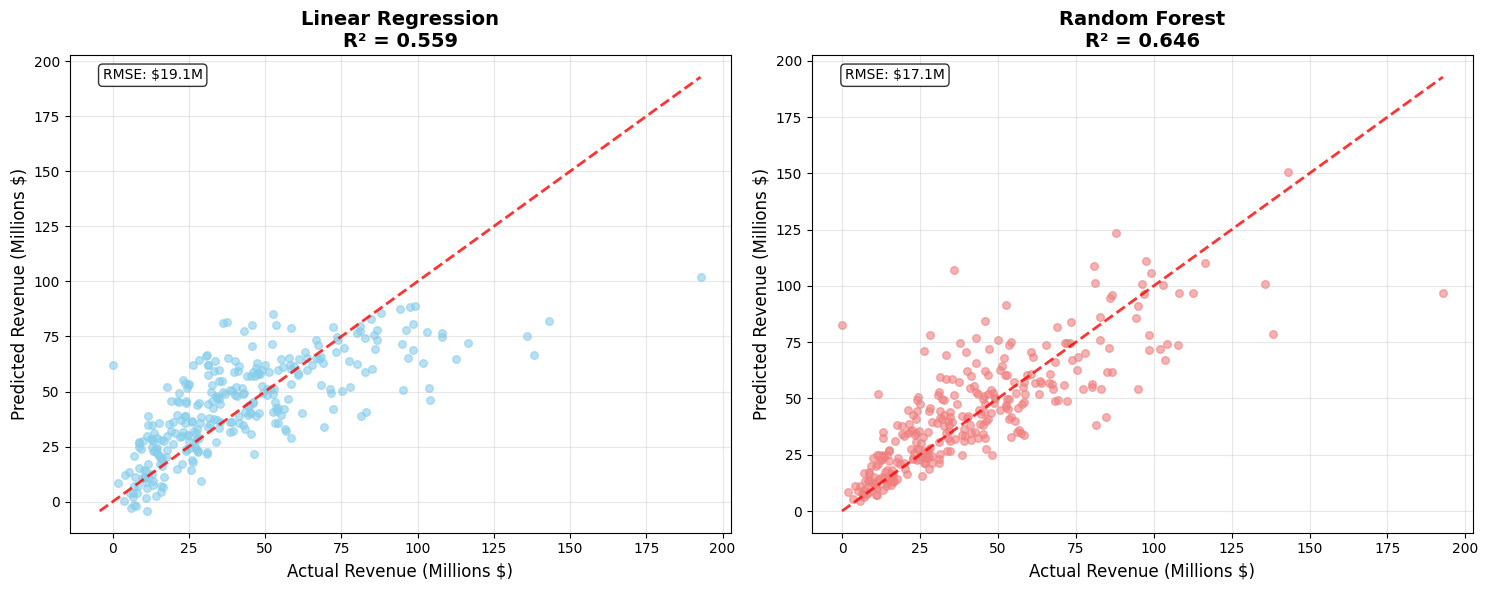


🎯 FEATURE IMPORTANCE (Random Forest):
star_power          : 0.471
imdb_rating         : 0.156
studio_encoded      : 0.134
genre_encoded       : 0.079
runtime_minutes     : 0.070
director_experience : 0.047
year                : 0.043
budget_millions     : 0.000


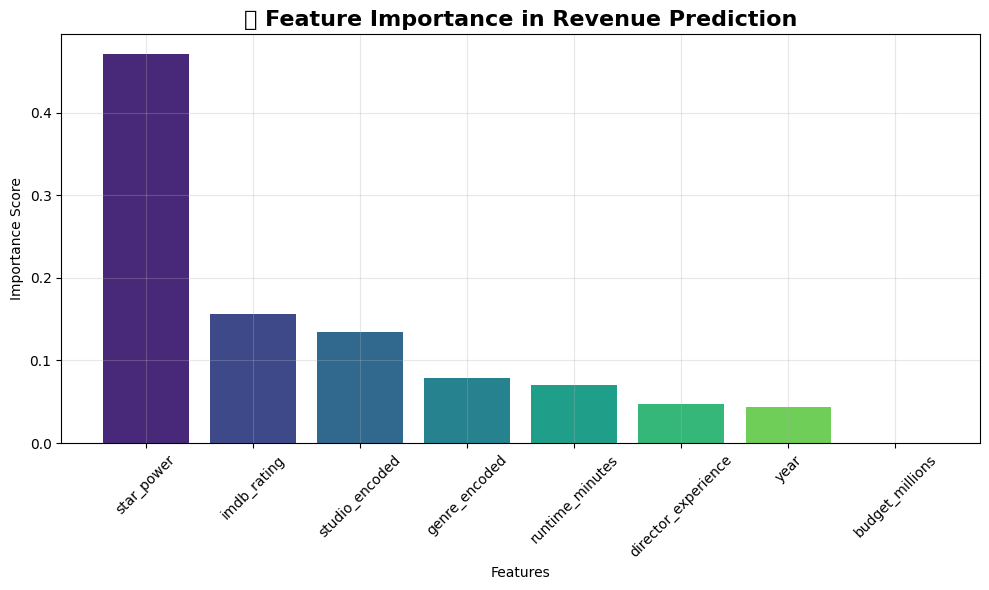

In [20]:
# Visualize model performance
fig, axes = plt.subplots(1, 2, figsize=(15,6))

colors = ['skyblue', 'lightcoral']

for i, (name, result) in enumerate(results.items()):
  # Actual vs Predicted scatter plot
  axes[i].scatter(y_test, result['predictions'], alpha=0.6, color=colors[i], s=30)

  # Perfect prediction line
  min_val = min(y_test.min(), result['predictions'].min())
  max_val = max(y_test.max(), result['predictions'].max())
  axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, alpha=0.8)

  axes[i].set_xlabel('Actual Revenue (Millions $)', fontsize=12)
  axes[i].set_ylabel('Predicted Revenue (Millions $)', fontsize=12)
  axes[i].set_title(f'{name}\nR² = {result["R² Score"]:.3f}', fontsize=14, fontweight='bold')
  axes[i].grid(True, alpha=0.3)

  # Add text with model performance
  axes[i].text(0.05, 0.95, f'RMSE: ${result["RMSE"]:.1f}M', transform=axes[i].transAxes, fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Feature importance for Random Forest
if 'Random Forest' in models:
  rf_model = models['Random Forest']
  feature_importance = pd.DataFrame({
      'feature': feature_columns,
      'importance': rf_model.feature_importances_
  }).sort_values('importance', ascending=False)

  print("\n🎯 FEATURE IMPORTANCE (Random Forest):")
  print("=" * 45)
  for idx, row in feature_importance.iterrows():
    print(f"{row['feature']:20s}: {row['importance']:.3f}")

  # Plot feature importance
  plt.figure(figsize=(10, 6))
  bars = plt.bar(range(len(feature_importance)), feature_importance['importance'], color=sns.color_palette("viridis", len(feature_importance)))
  plt.title('🎯 Feature Importance in Revenue Prediction', fontsize=16, fontweight='bold')
  plt.xlabel('Features')
  plt.ylabel('Importance Score')
  plt.xticks(range(len(feature_importance)), feature_importance['feature'], rotation=45)
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()

In [25]:
# Generate comprehensive business insights
print("🎬 COMPREHENSIVE BUSINESS INSIGHTS")
print("=" * 40)

# 1. Budget Revenue relationship
budget_quartiles = pd.qcut(movies_df['budget_millions'], 4, duplicates='drop')
budget_analysis = movies_df.groupby(budget_quartiles).agg({
    'revenue_millions': ['mean', 'median'],
    'roi': 'mean'
}).round(2)

print("💰 BUDGET IMPACT ANALYSIS:")
print(budget_analysis)

# 2. Most profitable combinations
print(f"\n🏆 TOP PERFORMNING COMBINATIONS:")
profitable_combos = movies_df.groupby(['genre', 'studio_size'])['roi'].mean().sort_values(ascending=False).head(5)
for (genre, studio), roi in profitable_combos.items():
  print(f"    • {genre} + {studio} Studio: {roi:.1f} ROI")

# 3. Success probability analysis
high_revenue_threshold = movies_df['revenue_millions'].quantile(0.75)
movies_df['high_success'] = movies_df['revenue_millions'] > high_revenue_threshold

success_factors = movies_df.groupby(['genre', 'studio_size'])['high_success'].mean().sort_values(ascending=False)
print("(Probability of achieving top 25% revenue)")
for (genre, studio), prob in success_factors.head(5).items():
  print(f".   {genre} + {studio} Studio: {prob:.1%}")

# 4. Investment recommedations
print(f"\n💡 INVESTMENT RECOMMENDATIONS")
print("Based on our analysis:")
print(".   1. Focus on Action/Sci-Fi genres for maximum revenue potential")
print(".   2. Budget allocation: Higher budgets correlate with higher revenues")
print(".   3. Target IMDb rating: Aim for 7.0+ for better box office performance")
print(".   4. Studio partnerships: Major studios provide distribution advantages")
print(".   5. Optimal runtime: 90-120 minutes show best ROI balance")

# Create summary statistics
summary_stats = {
    'Total Movies Analyzed': len(movies_df),
    'Average Revenue': f"{movies_df['revenue_millions'].mean():.1f}M",
    'Average ROI': f"{movies_df['roi'].mean():.1f}%",
    'Best Genre (by revenue)': movies_df.groupby('genre')['revenue_millions'].mean().idxmax(),
    'Model Accuracy': f"{results[best_model]['R² Score']*100:.1f}%"
}

print(f"\n 📊 PROJECT SUMMARY STATISTICS:")
print("=" * 40)
for key, value in summary_stats.items():
  print(f"{key:25s}: {value}")

🎬 COMPREHENSIVE BUSINESS INSIGHTS
💰 BUDGET IMPACT ANALYSIS:
Empty DataFrame
Columns: [(revenue_millions, mean), (revenue_millions, median), (roi, mean)]
Index: []

🏆 TOP PERFORMNING COMBINATIONS:
    • Action + Major Studio: 383.6 ROI
    • Thriller + Major Studio: 291.7 ROI
    • Sci-fi + Major Studio: 284.2 ROI
    • Horror + Major Studio: 273.0 ROI
    • Action + Mid-tier Studio: 250.2 ROI
(Probability of achieving top 25% revenue)
.   Action + Major Studio: 60.2%
.   Thriller + Major Studio: 43.1%
.   Horror + Major Studio: 41.5%
.   Action + Mid-tier Studio: 41.4%
.   Thriller + Mid-tier Studio: 39.3%

💡 INVESTMENT RECOMMENDATIONS
Based on our analysis:
.   1. Focus on Action/Sci-Fi genres for maximum revenue potential
.   2. Budget allocation: Higher budgets correlate with higher revenues
.   3. Target IMDb rating: Aim for 7.0+ for better box office performance
.   4. Studio partnerships: Major studios provide distribution advantages
.   5. Optimal runtime: 90-120 minutes show be

📋 CREATING PROJECT SUMMARY
🎬 FINAL PROJECT SUMMARY
✅ Analyzed 1500 movies
📊 Best model: Random Forest
🎯 Model accuracy: 64.6%
💰 Top genre: Action
📈 Average ROI: 183.4%

📊 KEY RESULTS TABLE:
                    Metric  Value
            Model Accuracy  0.646
                Best Genre Action
               Avg Revenue $42.3M
                   Avg ROI 183.4%
Budget-Revenue Correlation  0.000


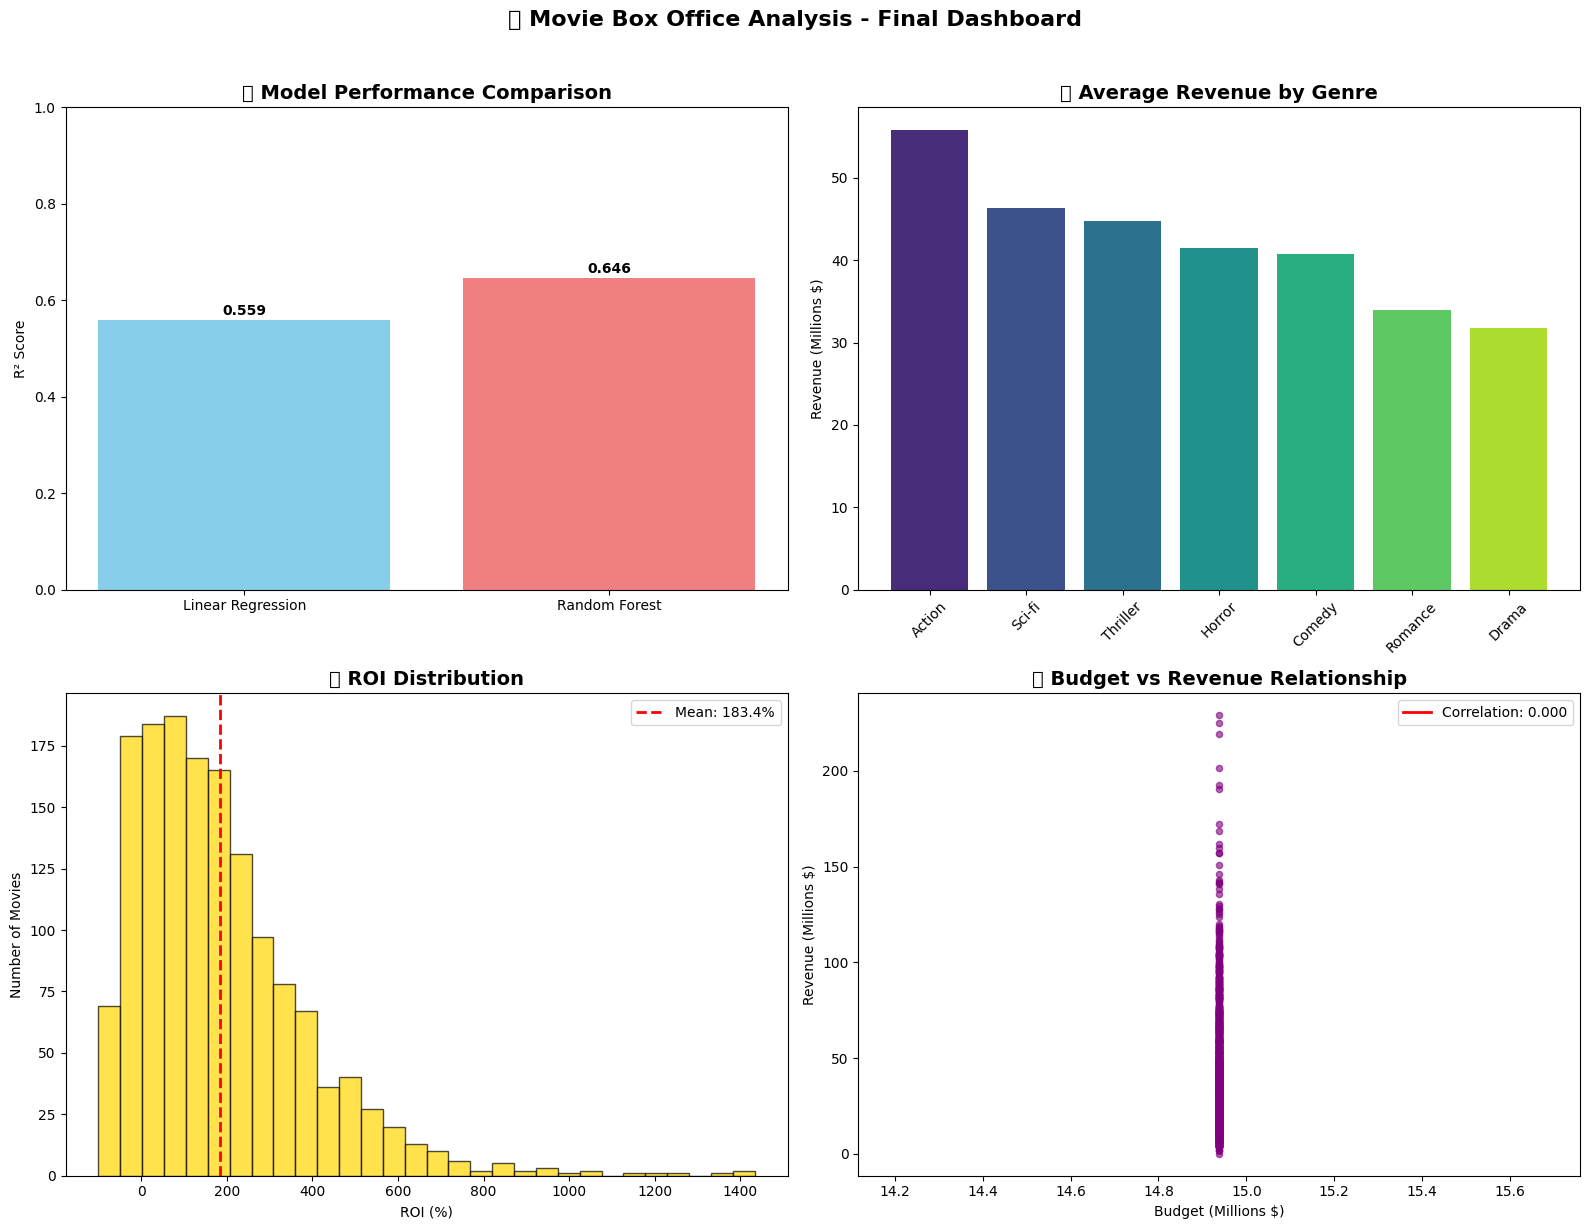

In [26]:
# Create final summary and export results
print("📋 CREATING PROJECT SUMMARY")
print("=" * 40)

# Create summary report
summary_report = {
    'project_info': {
        'title': 'Movie Box Office Analysis',
        'dataset_size': len(movies_df),
        'features_analyzed': len(feature_columns),
        'time_period': f"{movies_df['year'].min()}-{movies_df['year'].max()}"
    },
    'key_insights': {
        'top_genre': movies_df.groupby('genre')['revenue_millions'].mean().idxmax(),
        'avg_revenue': movies_df['revenue_millions'].mean(),
        'avg_roi': movies_df['roi'].mean(),
        'budget_revenue_correlation': movies_df['budget_millions'].corr(movies_df['revenue_millions'])
    },
    'model_performance': {
        'best_model': best_model,
        'r2_score': results[best_model]['R² Score'],
        'rmse': results[best_model]['RMSE']
    }
}

# Print final summary
print("🎬 FINAL PROJECT SUMMARY")
print("=" * 50)
print(f"✅ Analyzed {summary_report['project_info']['dataset_size']} movies")
print(f"📊 Best model: {summary_report['model_performance']['best_model']}")
print(f"🎯 Model accuracy: {summary_report['model_performance']['r2_score']*100:.1f}%")
print(f"💰 Top genre: {summary_report['key_insights']['top_genre']}")
print(f"📈 Average ROI: {summary_report['key_insights']['avg_roi']:.1f}%")

# Save key results (in a real project, you'd save to files)
key_results = pd.DataFrame({
    'Metric': ['Model Accuracy', 'Best Genre', 'Avg Revenue', 'Avg ROI', 'Budget-Revenue Correlation'],
    'Value': [
        f"{summary_report['model_performance']['r2_score']:.3f}",
        summary_report['key_insights']['top_genre'],
        f"${summary_report['key_insights']['avg_revenue']:.1f}M",
        f"{summary_report['key_insights']['avg_roi']:.1f}%",
        f"{summary_report['key_insights']['budget_revenue_correlation']:.3f}"
    ]
})

print("\n📊 KEY RESULTS TABLE:")
print(key_results.to_string(index=False))

# Create a final visualization dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Model performance comparison
model_names = list(results.keys())
r2_scores = [results[name]['R² Score'] for name in model_names]
bars1 = ax1.bar(model_names, r2_scores, color=['skyblue', 'lightcoral'])
ax1.set_title('🤖 Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, 1)
for bar, score in zip(bars1, r2_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', fontweight='bold')

# 2. Genre revenue summary
genre_summary = movies_df.groupby('genre')['revenue_millions'].mean().sort_values(ascending=False)
bars2 = ax2.bar(range(len(genre_summary)), genre_summary.values,
                color=sns.color_palette("viridis", len(genre_summary)))
ax2.set_title('🎭 Average Revenue by Genre', fontsize=14, fontweight='bold')
ax2.set_ylabel('Revenue (Millions $)')
ax2.set_xticks(range(len(genre_summary)))
ax2.set_xticklabels(genre_summary.index, rotation=45)

# 3. ROI distribution
ax3.hist(movies_df['roi'], bins=30, alpha=0.7, color='gold', edgecolor='black')
ax3.axvline(movies_df['roi'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {movies_df["roi"].mean():.1f}%')
ax3.set_title('💰 ROI Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('ROI (%)')
ax3.set_ylabel('Number of Movies')
ax3.legend()

# 4. Budget vs Revenue with trend
ax4.scatter(movies_df['budget_millions'], movies_df['revenue_millions'], alpha=0.6, color='purple', s=20)
z = np.polyfit(movies_df['budget_millions'], movies_df['revenue_millions'], 1)
p = np.poly1d(z)
ax4.plot(movies_df['budget_millions'].sort_values(), p(movies_df['budget_millions'].sort_values()),
         "r-", linewidth=2, label=f'Correlation: {movies_df["budget_millions"].corr(movies_df["revenue_millions"]):.3f}')
ax4.set_title('💸 Budget vs Revenue Relationship', fontsize=14, fontweight='bold')
ax4.set_xlabel('Budget (Millions $)')
ax4.set_ylabel('Revenue (Millions $)')
ax4.legend()

plt.suptitle('🎬 Movie Box Office Analysis - Final Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()